# **Extract data through Google API**

In [1]:
from call_ListGauges import get_ListGauges
from plots_maps import map_gauge_coordinates_of_country

In [2]:
import os
from typing import List, Dict, Any
import json
import pandas as pd
import geopandas as gpd
from shapely import geometry
import requests
import pprint
import datetime
import matplotlib.pyplot as plt

# Delete dependencies later, keep them for now for experminetation

##### **Steps**:
To get the data from the Google Bucket into workable format, we follow:
* Connect with the API
* **Expand this step!** Set-up pipeline which downloads all relevant data per country code
* Format the data into DateTime (y) and features (x)
* Store externally as .csv

##### **Background info -- API**
The API has three basic functions:
* *ListGauges*: Returns a list of supported gauges within a given country (code)
* *GetGaugeModel*: Returns model information of a specific gauge (within a given country, that is)
* *QueryGaugeForecasts*: Returns the forecasts of specific gauge

We'll create a pipeline going through these three functions, taking as input just the target country and outputting a DateTime-indexed .csv with all available forecasts for that country's available gauges. 

##### **(??? -> Maybe this is too much... A format which uses a list of matrices (an implicit tensor) where the matrices are just one gauge might be better. Either way, the metadata is best stored separately in a separate .csv. Choose adequate naming here.)**

For subsequent analysis, see ../analyse_data/

In [4]:
# Note: add this folder manually at the pointed path for the script to run
# For the key, ask the owner of the repository or try guessing
path_API_key = "../../data/keys/API_key.txt"

In [5]:
df_gauges_ML = get_ListGauges('Mali', path_API_key)

In [6]:
print(type(df_gauges_ML))
print(len(df_gauges_ML))
print(df_gauges_ML.columns)

<class 'pandas.core.frame.DataFrame'>
16
Index(['siteName', 'source', 'river', 'gaugeId', 'qualityVerified', 'latitude',
       'longitude'],
      dtype='object')


In [7]:
print(df_gauges_ML.head(2))

  siteName source      river           gaugeId  qualityVerified   latitude  \
0           HYBAS  Sankarani  hybas_1120766460             True  11.222917   
1           HYBAS             hybas_1120758950             True  11.427083   

   longitude  
0  -8.485417  
1  -6.581250  


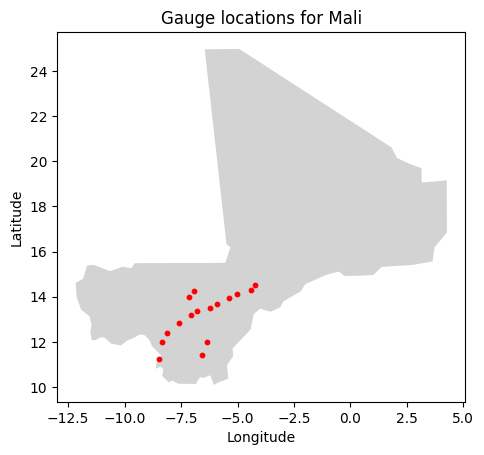

In [9]:
map_gauge_coordinates_of_country(df_gauges_ML, 'Mali')

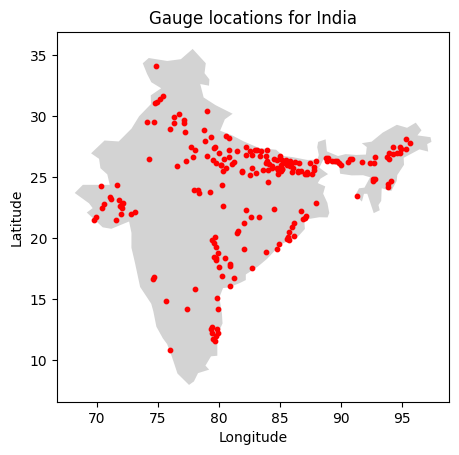

In [11]:
map_gauge_coordinates_of_country(
    get_ListGauges(
        'India', path_API_key
        ), 'India'
    )

In [50]:
from typing import List, Dict, Any
import requests
import pandas as pd

from extract_data.getters import get_API_key


def generate_url_GetGaugeModel(path_to_key : str) -> str:
    """
    Generate the URL to get the gauge model for a specific gauge

    :param path_to_key: path to the API key
    :return: the URL
    """
    
    # NEXT STEP: Kijk in voorbeeld Colab hoe ze het doen want de .pdf instructie klopt niet